In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
test_output = pd.read_csv("/content/gender_submission.csv")

In [ ]:
print('Shape of train: ', train.shape)

print('Shape of test: ', test.shape)


Shape of train:  (891, 12)
Shape of test:  (418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = train["Embarked"].fillna("S") #fill with most common value
train["Embarked"] = le.fit_transform(train["Embarked"])
train["Age"] = train["Age"].fillna(train["Age"].median()) #fill missing values with median age
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [ ]:
#select dependent, independent variables for analysis.
#A priori expectations -> PClass, age and sex likely  significant
X_train = train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
#X_train = train[["Pclass","Sex","Age"]]
X_train = X_train.values
y_train = train[["Survived"]].values

# Set a random seed for reproducibility
np.random.seed(42)
# Generate 481 random indices
random_indices = np.random.choice(len(y_train), 418, replace=False)
# Use the random indices to extract corresponding labels from y_train
y_test = y_train[random_indices]

#standardize data for MLP
#from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
print(X_train)


[[ 0.82737724  0.73769513 -0.56573646 ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.66386103 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25833709 ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.1046374  ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.25833709 ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.20276197 ... -0.47367361 -0.49237783
  -0.67817453]]


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(891, 7)
(891, 1)
(418, 1)


Data Pre-processing

In [ ]:
#prepare test data for predictions
test["Sex"] = le.fit_transform(test["Sex"])
test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"] = le.fit_transform(test["Embarked"])
test["Name"] = le.fit_transform(test["Name"])
#test["Age"] = test["Age"].fillna(test["Age"].median())
X_test = test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].median())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())
X_test = X_test.values
X_test = preprocessing.scale(X_test)
X_test.shape

(418, 7)

In [ ]:
print('Shape of X: ', X_train.shape)
print('Shape of y: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)

Shape of X:  (891, 7)
Shape of y:  (891, 1)
Shape of X_test:  (418, 7)


In [ ]:
print('X: ', type(X_train))
print('y: ', type(y_train))
print('X_test: ', type(X_test))

X:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
X_test:  <class 'numpy.ndarray'>


In [ ]:
print('X: ', type(X_train))
print('y: ', type(y_train))
print('X_test: ', type(X_test))

X:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
X_test:  <class 'numpy.ndarray'>


Now, we build the model

Sigmoid Activation Function

In [ ]:
def sigmoid_act(x, der=False, dtype=np.float128):
  if der:
    f = 1/(1 + np.exp(-x))
    df = f * (1 - f)
    return df
  else:
    f = 1/(1 + np.exp(-x))
    return f

ANN model building

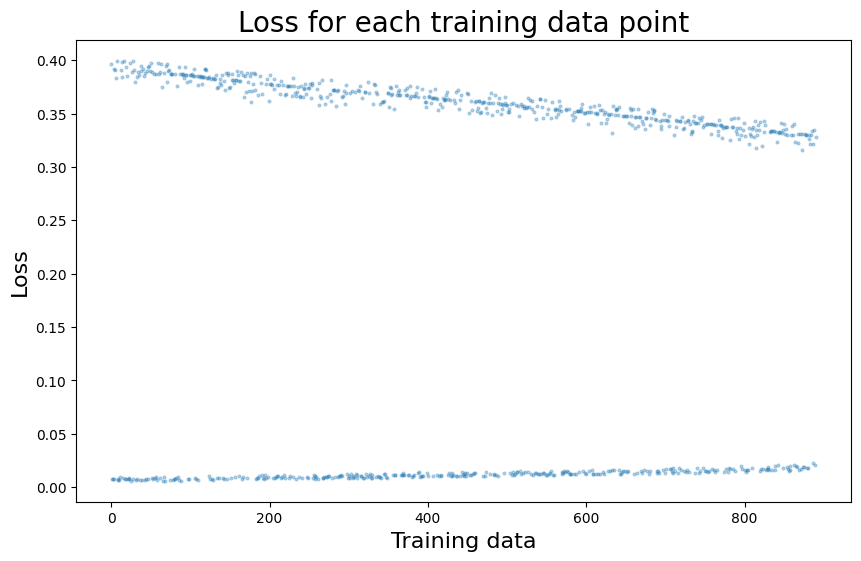

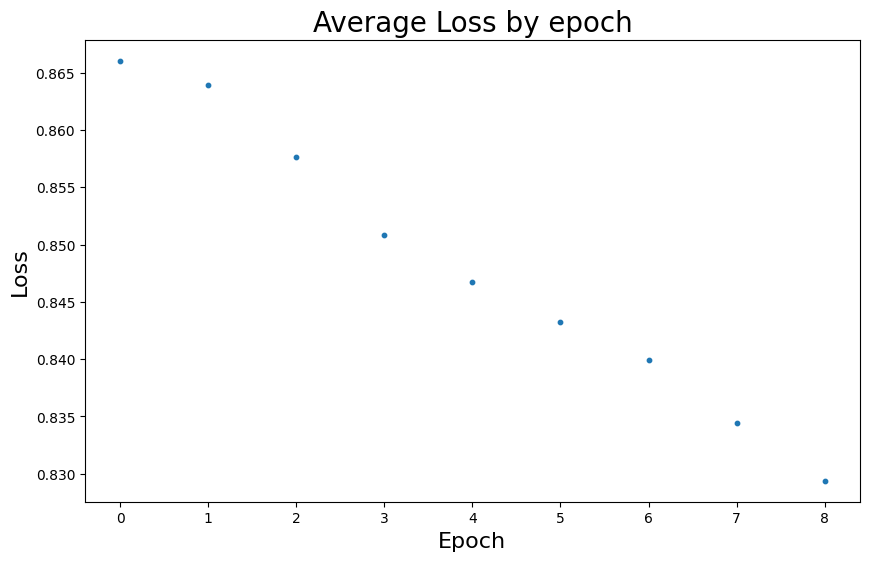

In [ ]:
# Set up the number of perceptron per each layer:
p = 4 # Layer 1
q = 4 # Layer 2

# Set up the Learning rate
eta =  1/623


# 0: Random initialize the relevant data
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:

    # 1: input the data
    x = X_train[I]


    # 2: Start the algorithm

    # 2.1: Feed forward
    z1 = sigmoid_act(np.dot(w1, x) + b1) # output layer 1
    z2 = sigmoid_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # output of the Output layer

    #2.2: Compute the output layer's error
    delta_Out =  (y - y_train[I]) * sigmoid_act(y, der=True)

    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * sigmoid_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * sigmoid_act(z1, der=True) # First Layer Error

    # 3: Gradient descent
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out

    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2

    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1

    # 4. Computation of the loss function
    mu.append((1/2)*(y-y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)


plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Average Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

In [ ]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    pred = []

    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data
        x = X_test[I]

        # 2.1: Feed forward
        z1 = sigmoid_act(np.dot(w1, x) + b1) # output layer 1
        z2 = sigmoid_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer

        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )

    return np.array(pred)

In [ ]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

predictions.shape

(418,)

In [ ]:
from sklearn.metrics import accuracy_score

# Plot the confusion matrix
"""
cm = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()
"""

accuracy = accuracy_score(y_test, predictions)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.40669856459330145
